># Sales Performance Analysis and Demand Forecasting in Global Superstore

 **IMPORTING THE REQUIRED LIBRARIES**


In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# DATA PREPROCESSING

**DATA COLLECTION**

In [2]:
store = pd.read_csv("superstore.csv")
store = store[[ 'Product.Name', 'Category','Sub.Category', 'Country','State', 'Customer.ID',
       'Customer.Name','Order.ID','Order.Date', 'Region','Ship.Date', 'Ship.Mode', 'Shipping.Cost',
       'Discount', 'Profit', 'Quantity','Sales', 'Segment']]
store.head()

,Product.Name,Category,Sub.Category,Country,State,Customer.ID,Customer.Name,Order.ID,Order.Date,Region,Ship.Date,Ship.Mode,Shipping.Cost,Discount,Profit,Quantity,Sales,Segment
0,Xerox 225,Office Supplies,Paper,United States,California,LS-172304,Lycoris Saunders,CA-2011-130813,2011-01-07 00:00:00.000,West,2011-01-09 00:00:00.000,Second Class,4.37,0.0,9.3312,3,19,Consumer
1,"Wirebound Service Call Books, 5 1/2"" x 4""",Office Supplies,Paper,United States,California,MV-174854,Mark Van Huff,CA-2011-148614,2011-01-21 00:00:00.000,West,2011-01-26 00:00:00.000,Standard Class,0.94,0.0,9.2928,2,19,Consumer
2,"Adams Phone Message Book, Professional, 400 Me...",Office Supplies,Paper,United States,California,CS-121304,Chad Sievert,CA-2011-118962,2011-08-05 00:00:00.000,West,2011-08-09 00:00:00.000,Standard Class,1.81,0.0,9.8418,3,21,Consumer
3,Xerox 1913,Office Supplies,Paper,United States,California,CS-121304,Chad Sievert,CA-2011-118962,2011-08-05 00:00:00.000,West,2011-08-09 00:00:00.000,Standard Class,4.59,0.0,53.2608,2,111,Consumer
4,Xerox 223,Office Supplies,Paper,United States,California,AP-109154,Arthur Prichep,CA-2011-146969,2011-09-29 00:00:00.000,West,2011-10-03 00:00:00.000,Standard Class,1.32,0.0,3.1104,1,6,Consumer


In [3]:
store.columns

Index(['Product.Name', 'Category', 'Sub.Category', 'Country', 'State',
       'Customer.ID', 'Customer.Name', 'Order.ID', 'Order.Date', 'Region',
       'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'Discount', 'Profit',
       'Quantity', 'Sales', 'Segment'],
      dtype='object')

In [4]:
a,b=store.shape
print(f'this dataset contains {a} Records & {b} Atributes')

this dataset contains 51290 Records & 18 Atributes


In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product.Name   51290 non-null  object 
 1   Category       51290 non-null  object 
 2   Sub.Category   51290 non-null  object 
 3   Country        51290 non-null  object 
 4   State          51290 non-null  object 
 5   Customer.ID    51290 non-null  object 
 6   Customer.Name  51290 non-null  object 
 7   Order.ID       51290 non-null  object 
 8   Order.Date     51290 non-null  object 
 9   Region         51290 non-null  object 
 10  Ship.Date      51290 non-null  object 
 11  Ship.Mode      51290 non-null  object 
 12  Shipping.Cost  51290 non-null  float64
 13  Discount       51290 non-null  float64
 14  Profit         51290 non-null  float64
 15  Quantity       51290 non-null  int64  
 16  Sales          51290 non-null  int64  
 17  Segment        51290 non-null  object 
dtypes: flo

*this dataset not contain any NULL-VALUES*

In [6]:
store.describe()

,Shipping.Cost,Discount,Profit,Quantity,Sales
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,26.375818,0.142908,28.610982,3.476545,246.498440
std,57.296810,0.212280,174.340972,2.278766,487.567175
min,0.002000,0.000000,-6599.978000,1.000000,0.000000
25%,2.610000,0.000000,0.000000,2.000000,31.000000
50%,7.790000,0.000000,9.240000,3.000000,85.000000
75%,24.450000,0.200000,36.810000,5.000000,251.000000
max,933.570000,0.850000,8399.976000,14.000000,22638.000000


**CREATEING NEW CLOUMN**

In [7]:
store['Price']=round(store['Sales']/ store['Quantity'] ,3)

-------------------

># IDENTIFYING STATES WITH SUBOPTIMAL SALES PERFORMANCE

In [8]:
state = store.groupby('State')['Sales'].sum().nsmallest(10).reset_index()
state

,State,Sales
0,Matabeleland North,3
1,Kabarole,4
2,Bitola,11
3,Manicaland,12
4,Pernik,15
5,Edirne,19
6,Rize,19
7,Gangwon,22
8,Zhambyl,22
9,Casanare,23


-------------------------

># TOP 10 PROFITABLE CUSTOMERS

In [9]:
custom = store.groupby(['Customer.ID','Customer.Name'])['Profit'].sum().nlargest(10).reset_index()
custom

,Customer.ID,Customer.Name,Profit
0,TC-209804,Tamara Chand,8981.3239
1,RB-193604,Raymond Buch,6976.0959
2,SC-200954,Sanjit Chand,5757.4119
3,HL-150404,Hunter Lopez,5622.4292
4,AB-101054,Adrian Barton,5444.8055
5,SP-209202,Susan Pistek,4974.5130
6,TA-213854,Tom Ashbrook,4703.7883
7,CA-127751,Cynthia Arntzen,4045.8780
8,PJ-188352,Patrick Jones,3986.0040
9,CM-123854,Christopher Martinez,3899.8904


-------------------

># SUB-CATEGORY WISE SALES

In [10]:
#sub-Category wise Sale
scat = store.groupby('Sub.Category')['Sales'].sum().reset_index()
scat

,Sub.Category,Sales
0,Accessories,749307
1,Appliances,1011081
2,Art,372163
3,Binders,461952
4,Bookcases,1466559
5,Chairs,1501682
6,Copiers,1509439
7,Envelopes,170926
8,Fasteners,83254
9,Furnishings,385609


Text(0.5, 1.0, 'Sub-Category wise Sales')

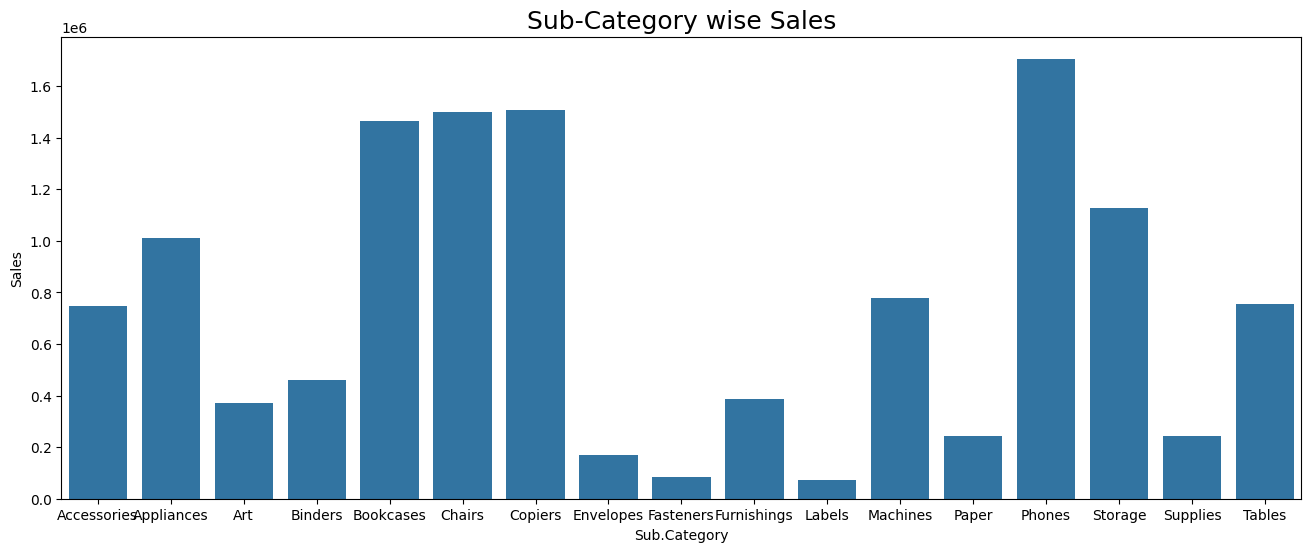

In [11]:
plt.figure(figsize=(16,6))
sns.barplot(x='Sub.Category',y='Sales',data=scat)
plt.title('Sub-Category wise Sales',fontsize=18)


--------------

># TO FIND CATEGORY WISE PROFIT CONTRIBUTION

In [12]:
cat = store.groupby('Category')['Profit'].sum().reset_index()
cat

,Category,Profit
0,Furniture,285204.72380
1,Office Supplies,518473.83430
2,Technology,663778.73318


Text(0.5, 1.0, 'Category wise Profit Contribution')

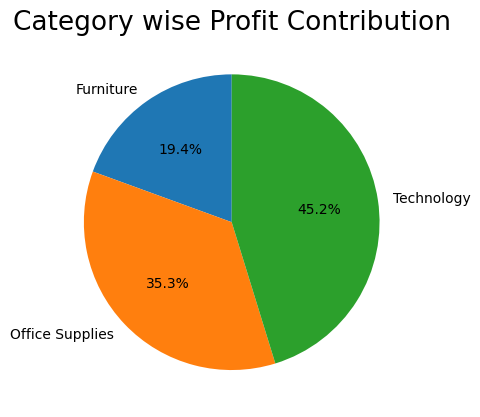

In [13]:
plt.pie(cat['Profit'],labels=cat['Category'],autopct='%1.1f%%',startangle=90)
plt.title("Category wise Profit Contribution",fontsize=19)

------------

># REGION AND CATEGORY WISE SHIPPING-COST

In [14]:
rect = store.groupby(["Region", "Category"])["Shipping.Cost"].sum().reset_index()
rect


,Region,Category,Shipping.Cost
0,Africa,Furniture,20409.0400
1,Africa,Office Supplies,31095.9400
2,Africa,Technology,36634.4900
3,Canada,Furniture,1194.7500
4,Canada,Office Supplies,3388.5300
5,Canada,Technology,2822.3500
6,Caribbean,Furniture,12644.8460
7,Caribbean,Office Supplies,10323.4560
8,Caribbean,Technology,12621.0740
9,Central,Furniture,89224.6550


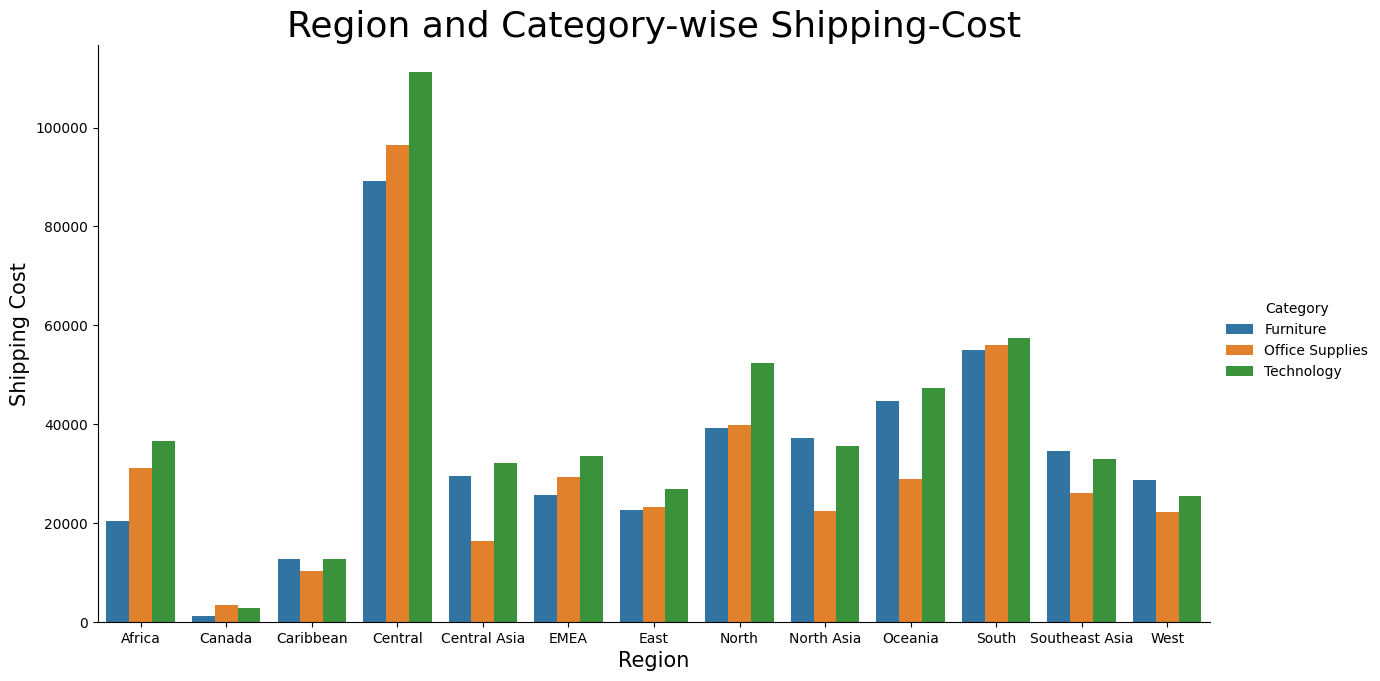

In [15]:
sns.catplot( x="Region", y="Shipping.Cost",data=rect, hue="Category", kind="bar", height=6.5, aspect=1.9)
plt.title("Region and Category-wise Shipping-Cost",fontsize=26)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Shipping Cost',fontsize=15)
plt.show()

---------------------------------------

># TOP 10 PRODUCT WHICH CONTRIBUTES HIGH PROFIT

In [16]:

prod = store.groupby('Product.Name')['Profit'].sum().sort_values(ascending=False)
prod = prod.reset_index().head(10)
prod

,Product.Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,"Cisco Smart Phone, Full Size",17238.5206
2,"Motorola Smart Phone, Full Size",17027.1130
3,"Hoover Stove, Red",11807.9690
4,"Sauder Classic Bookcase, Traditional",10672.0730
5,"Harbour Creations Executive Leather Armchair, ...",10427.3260
6,"Nokia Smart Phone, Full Size",9938.1955
7,"Cisco Smart Phone, with Caller ID",9786.6408
8,"Nokia Smart Phone, with Caller ID",9465.3257
9,"Belkin Router, USB",8955.0180


Text(0.5, 1.0, 'Top 10 Products with High Profit')

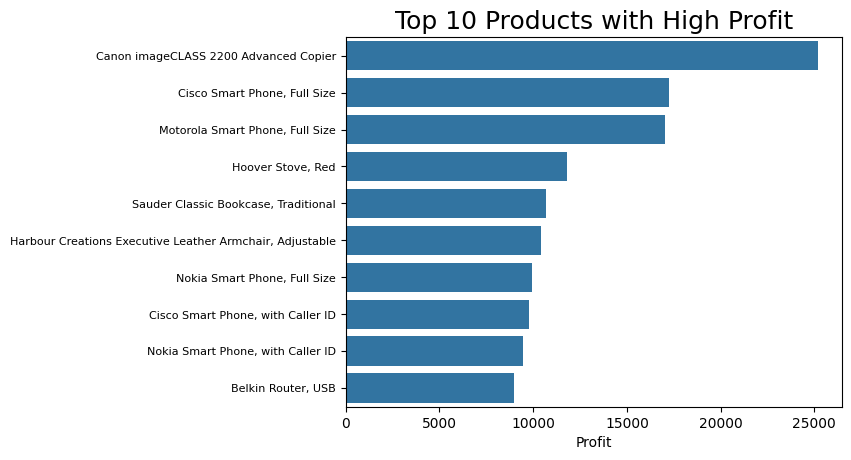

In [17]:
sns.barplot(x='Profit',y='Product.Name',width=0.8,data=prod,orient='h')
plt.ylabel(None)
plt.yticks(fontsize=8)         
plt.title('Top 10 Products with High Profit',fontsize=18)


>-----------------

># CONCLUSION

The Global Superstore Dataset provides a comprehensive overview of sales, profits, and customer data across various regions and product categories. Analyzing this dataset can help identify key trends, optimize inventory, and improve customer satisfaction. It is a valuable resource for data-driven decision-making in retail management.

-------------------